In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# session.query(Measurement.date).order_by(Measurement.date).first()
# session.query(Measurement.date).order_by(Measurement.date)
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent

'2017-08-23'

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_date = dt.datetime.strptime(most_recent,'%Y-%m-%d').date()
starting_date = recent_date - dt.timedelta(days=365)
starting_date, recent_date
# Calculate the date one year from the last date in data set.
one_year_records = session.query(Measurement.date, Measurement.prcp).filter(
    func.datetime(Measurement.date) >= starting_date,
    func.datetime(Measurement.date) <= recent_date
).all()
# one_year_records
# # Perform a query to retrieve the data and precipitation scores
data = {"Date": [],"Precipitation Score":[]}
for record in one_year_records:
    data['Date'].append(record.date)
    data['Precipitation Score'].append(record.prcp)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data)
# Sort the dataframe by date
df_sorted = df.sort_values(by='Date')
print(df_sorted)

            Date  Precipitation Score
0     2016-08-23                 0.00
1007  2016-08-23                  NaN
1526  2016-08-23                 1.79
703   2016-08-23                 0.05
360   2016-08-23                 0.15
...          ...                  ...
1006  2017-08-21                 0.02
358   2017-08-21                 0.00
359   2017-08-22                 0.00
1525  2017-08-22                 0.00
2225  2017-08-22                 0.50

[2226 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

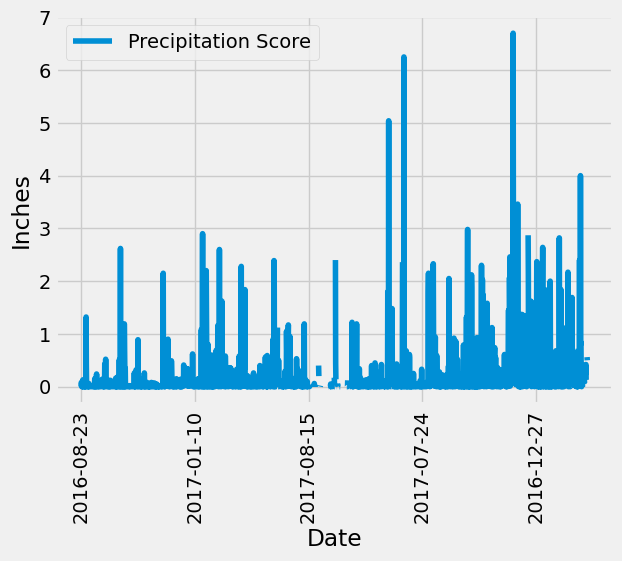

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation Score', rot=90)
# plt.bar(df["Date"], df["Precipitation Score"], color="b", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper left')
plt.show

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation Score
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(Station).count()
stations_count

9


In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first()
print(min_temp, max_temp, avg_temp)

(54.0,) (85.0,) (71.66378066378067,)


Text(0.5, 4.183333333333314, 'Temperature')

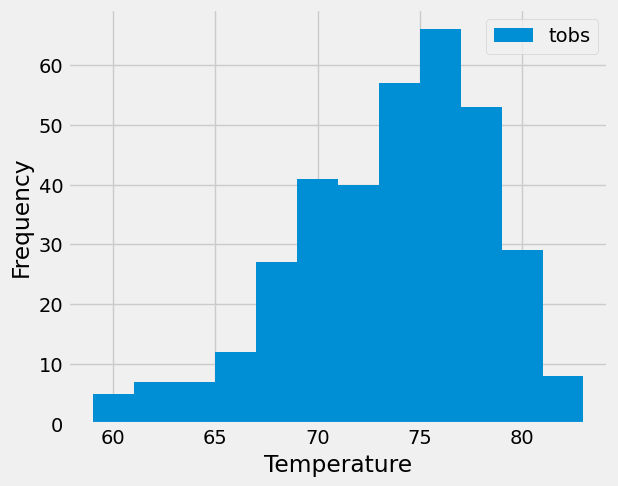

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

# Close Session

In [16]:
# Close Session
session.close()


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
def start_date(start):


    session = Session(engine)
    # For a specified start, calculate TMIN, TAVG, and TMAX for all the dates greater than or equal to the start date.
    start_tobs = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.date >= start).all()

    start_tobs_list = []
    for min, max, avg in start_tobs:
        start_dict = {}
        start_dict["min"] = min
        start_dict["max"] = max
        start_dict["avg"] = avg
        start_tobs_list.append(start_dict)
    return start_tobs_list

start=starting_date
start_date(start)

[{'min': 58.0, 'max': 87.0, 'avg': 74.59058295964125}]